In [50]:
import pandas as pd
import numpy as np
import sys

sys.path.append("../")
from adamodaran_utils import get_adamodar_file

In [51]:
years = np.array(range(2017,2024))
margin = dict.fromkeys(years)
for year in years:
    df = get_adamodar_file(filename="margin", year=year-2000)
    margin[year] = df

In [58]:
industry = "Electronics (Consumer & Office)"
ind_margins = pd.DataFrame(columns=["Gross margin", "Operating margin", "COGS rate", "SG&A rate"])#, index=pd.to_datetime(years, format="%Y")+pd.offsets.YearEnd(0))
for year in years:
    ind_margins.loc[year, 'Gross margin'] = np.round(margin[year].loc[industry, 'Gross Margin']*100)
    ind_margins.loc[year, 'Operating margin'] = np.round(margin[year].loc[industry, 'After-tax Lease & R&D adj Margin']*100)
    ind_margins.loc[year, 'COGS rate'] = np.round(margin[year].loc[industry, 'COGS/Sales']*100)
    ind_margins.loc[year, 'SG&A rate'] = np.round(margin[year].loc[industry, 'SG&A/ Sales']*100)

ind_margins.index = pd.to_datetime(ind_margins.index, format="%Y")+pd.offsets.YearEnd(0)

print(ind_margins)

           Gross margin Operating margin COGS rate SG&A rate
2017-12-31         33.0             -4.0      67.0      24.0
2018-12-31         34.0             -2.0      66.0      25.0
2019-12-31         33.0             -1.0      67.0      25.0
2020-12-31         36.0              3.0      64.0      24.0
2021-12-31         32.0              5.0      68.0      21.0
2022-12-31         32.0              2.0      68.0      22.0
2023-12-31         32.0              1.0      68.0      23.0


<Axes: >

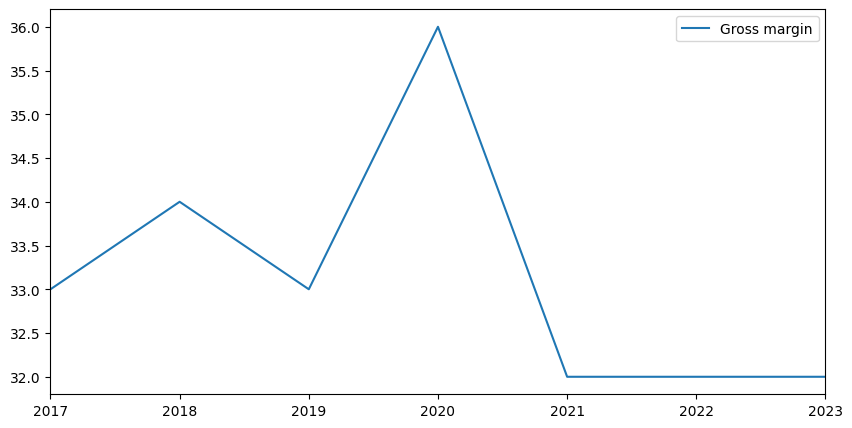

In [59]:
# Plot margins change over time for an industry. 
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,1,figsize=(10,5))
ind_margins.plot(y=['Gross margin'], ax=ax)